## Testing notebook

[link](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/sea-level-predictor)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## draw_line_plot

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

Text(0, 0.5, 'Page Views')

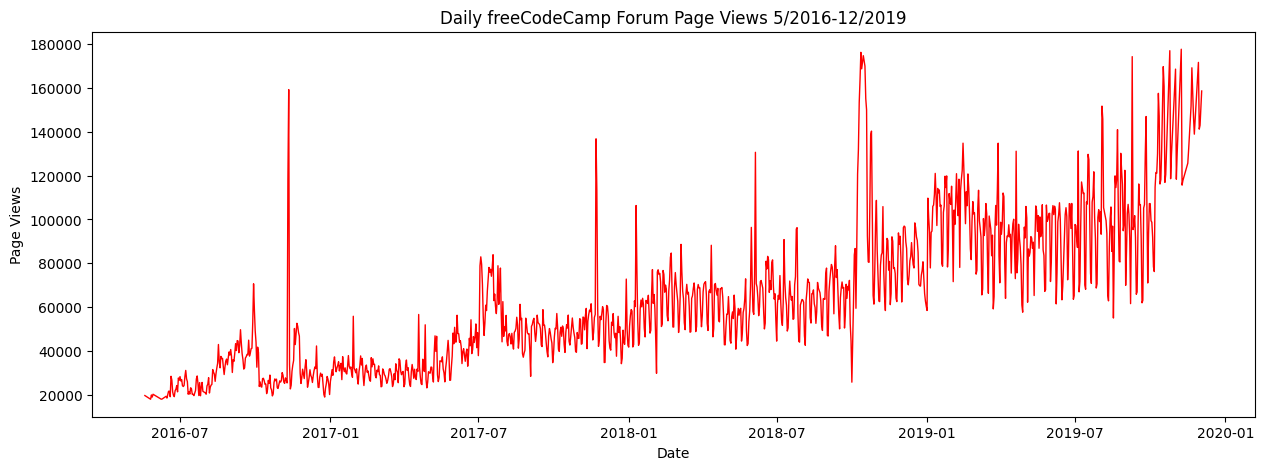

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='red', linewidth=1)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

##  draw_bar_plot

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Assume df has datetime index and 'value' column
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month

df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
# Compute average value for each (year, month)
#df_grouped = df.groupby(['year', 'month'])['value'].mean().unstack()
df_grouped

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


In [7]:
df_pivot = df_bar.pivot_table(values='value', index='year', columns='month',aggfunc='mean')
df_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


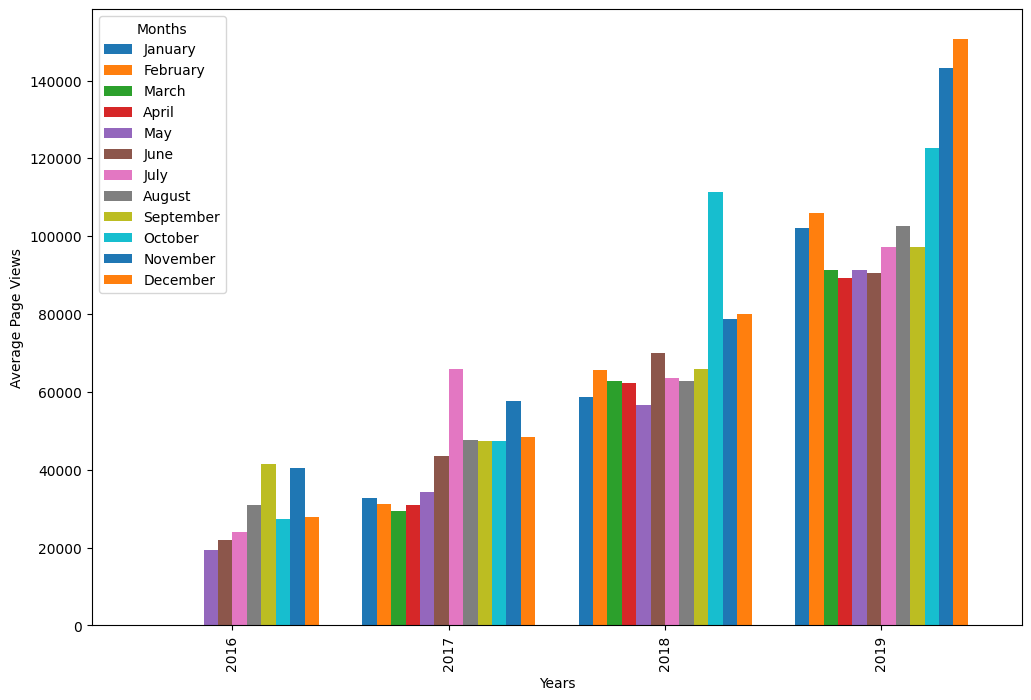

In [8]:
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Draw bar plot
fig,ax = plt.subplots(figsize=(12, 8))
df_pivot.plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")
ax.legend(title='Months', labels=month_names)

## draw_box_plot 

In [9]:
import seaborn as sns

In [10]:
df_box = df.copy()
df_box['year'] = df_box.index.year
df_box['month'] = df_box.index.month
df_box.reset_index(inplace=True)
df_box

,date,value,year,month
0,2016-05-19,19736,2016,5
1,2016-05-26,18060,2016,5
2,2016-05-27,19997,2016,5
3,2016-05-28,19044,2016,5
4,2016-05-29,20325,2016,5
...,...,...,...,...
1233,2019-11-24,138875,2019,11
1234,2019-11-29,171584,2019,11
1235,2019-11-30,141161,2019,11
1236,2019-12-01,142918,2019,12


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


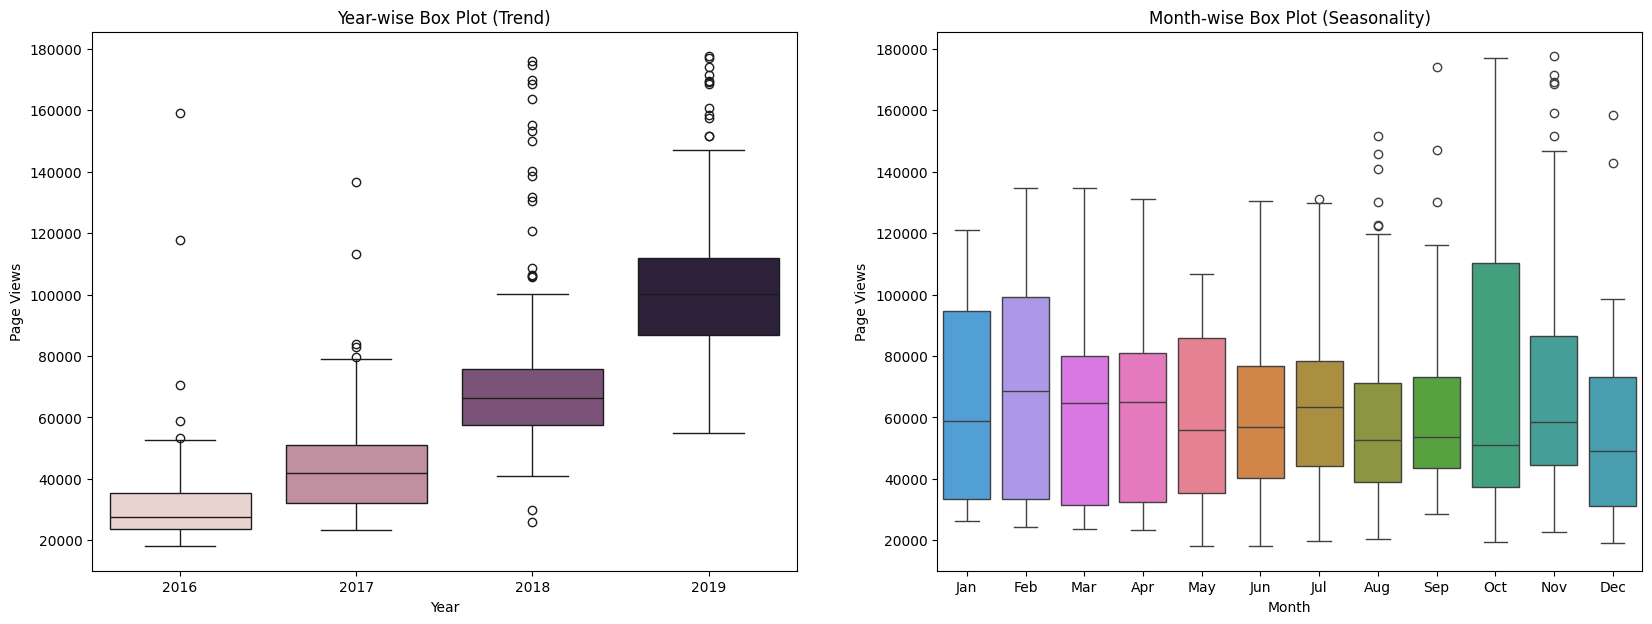

In [21]:
# Add a string column for month abbreviations for correct x-axis order
month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_box['month_str'] = df_box['month'].map(lambda x: month_abbr[x-1])
month_order = month_abbr

# Draw box plots (using Seaborn)
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Year-wise Box Plot (Trend)
sns.boxplot(x='year', y='value',hue='year', data=df_box, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[0].legend().remove() 
# Month-wise Box Plot (Seasonality)
sns.boxplot(x='month_str', y='value', hue='month_str', data=df_box, order=month_order, ax=axes[1])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
axes[1].legend().remove()